# Excercise 46: Missing Value Preprocessing with High Reproducibilit

## Activity A
Using the source code developed in the previous exercise, create functions that enable code reuse
and reproducibility of the experiment. Provide sourcecode documentation following the Google
docstring style.

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import collections
import random
import numpy as np

In [38]:
def generateMissingVal(df,ml):
    ''' Generate missing values in dataset
    Args:
        df (pandas.core.frame.DataFrame): pandas dataframe data set
        ml (float): missing values level - range: 0-1
    '''
    import random
    #collect the indexes (row, col) from dataframe
    replaced = collections.defaultdict(set)
    ix = [(row, col) for row in range(df.shape[0]) for col in range(df.shape[1])]
    #randomly shuffle the collection of indexes
    random.shuffle(ix)
    #set the ammount of replaced values at level of 10%
    to_replace = int(round(ml * len(ix)))
    #perform replacing of existing values with missing values
    for row, col in ix:
        if len(replaced[row]) < df.shape[1] - 1:
            df.iloc[row, col] = np.nan
            to_replace -= 1
            replaced[row].add(col)
            if to_replace == 0:
                break


def calcIQR(df):
    '''Define the range of Interquartile Ranges (IQRs) and apply them to the dataset to identify the outliers.
    Args:
        df (pandas.core.frame.DataFrame): pandas dataframe data set
    Returns:
        lw (pandas.core.series.Series): lower 1.5*IQR whisker
        uW (pandas.core.series.Series): upper 1.5*IQR whisker
        '''
    #get only numeric data frame from dataframe
    num = df._get_numeric_data()
    #calc first quartile Q1
    Q1 = num.quantile(0.25)
    #calc third quartile Q3
    Q3 = num.quantile(0.75)
    #calc interquatile range IRQ
    IQR = Q3 - Q1
    #calc lower 1.5*IQR whisker
    lW = Q1 - 1.5 * IQR
    #calc upper 1.5*IQR whisker
    uW = Q3 + 1.5 * IQR
    return lW, uW

def showOutliers(col, df, uW, lW, kind):
    '''Show chosen outliers records from dataframe.
    Args:
        col(string): datafrme column name
        df (pandas.core.frame.DataFrame): pandas dataframe data set
        uW (pandas.core.series.Series): upper 1.5*IQR whisker
        lW (pandas.core.series.Series): lower 1.5*IQR whisker
        kind (string): kind of outlier, acceptable values are: 'upper', 'lower', 'both'
    Returns:
        (pandas.core.frame.DataFrame): pandas dataframe data set with outliers records'''
    
    #show upper outliers for age
    if kind == 'upper':
        df[(df[col]>uW[col])]
    elif kind == 'lower':
        df[(df[col]<lW[col])]
    elif kind == 'both':
        return df[(df[col]>uW[col]) | (df[col]<lW[col])]
        
def plotOutliers(col,df):
    '''Plot boxplot for chosen column from dataframe
    Args:
        col(string): dataframe column name
        df(pandas.core.frame.DataFrame): pandas dataframe data set
    '''
    
    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.boxplot(data=df, y=col)

age          444
job          425
marital      454
education    442
default      451
balance      470
housing      444
loan         465
contact      481
day          429
month        436
duration     455
campaign     475
pdays        427
previous     462
poutcome     455
y            471
dtype: int64


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
36,78.0,retired,divorced,primary,no,229.0,no,no,telephone,22.0,oct,97.0,1.0,-1.0,0.0,NaN,yes
129,77.0,retired,divorced,tertiary,no,4659.0,NaN,no,cellular,14.0,apr,161.0,1.0,-1.0,0.0,unknown,yes
412,75.0,retired,divorced,tertiary,no,3810.0,yes,no,cellular,16.0,nov,262.0,1.0,183.0,1.0,failure,yes
477,77.0,retired,married,tertiary,no,7802.0,no,no,telephone,4.0,may,421.0,1.0,92.0,2.0,success,yes
573,81.0,retired,married,secondary,no,1.0,no,no,cellular,19.0,NaN,65.0,5.0,-1.0,0.0,unknown,no
633,83.0,retired,married,secondary,no,0.0,no,NaN,cellular,18.0,mar,140.0,10.0,NaN,0.0,unknown,no
688,80.0,management,married,NaN,no,6483.0,no,no,telephone,19.0,oct,123.0,1.0,-1.0,0.0,unknown,no
1126,77.0,retired,married,secondary,no,610.0,no,no,cellular,13.0,aug,766.0,3.0,-1.0,NaN,unknown,no
1186,71.0,technician,married,tertiary,no,383.0,no,no,cellular,27.0,oct,327.0,2.0,183.0,3.0,success,no
1196,72.0,blue-collar,married,primary,no,4415.0,no,no,telephone,13.0,oct,120.0,1.0,NaN,0.0,unknown,no


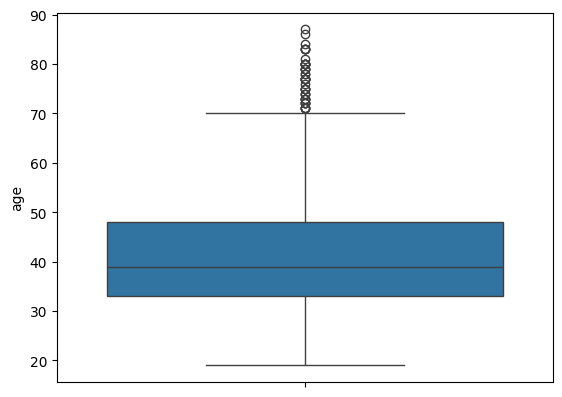

In [39]:
#test case
df = pd.read_csv('/workspaces/DataCamp---Data-Scientist-with-Python/09 Analiza dużych zbiorów danych I/bank.csv', sep=';')
ml = 0.1
generateMissingVal(df,ml)
lW, uW = calcIQR(df)
print(df.isna().sum())
display(showOutliers('age', df, uW, lW, 'both'))
plotOutliers('age',df)

In [40]:
showOutliers('age', df, uW, lW, 'both')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
36,78.0,retired,divorced,primary,no,229.0,no,no,telephone,22.0,oct,97.0,1.0,-1.0,0.0,NaN,yes
129,77.0,retired,divorced,tertiary,no,4659.0,NaN,no,cellular,14.0,apr,161.0,1.0,-1.0,0.0,unknown,yes
412,75.0,retired,divorced,tertiary,no,3810.0,yes,no,cellular,16.0,nov,262.0,1.0,183.0,1.0,failure,yes
477,77.0,retired,married,tertiary,no,7802.0,no,no,telephone,4.0,may,421.0,1.0,92.0,2.0,success,yes
573,81.0,retired,married,secondary,no,1.0,no,no,cellular,19.0,NaN,65.0,5.0,-1.0,0.0,unknown,no
633,83.0,retired,married,secondary,no,0.0,no,NaN,cellular,18.0,mar,140.0,10.0,NaN,0.0,unknown,no
688,80.0,management,married,NaN,no,6483.0,no,no,telephone,19.0,oct,123.0,1.0,-1.0,0.0,unknown,no
1126,77.0,retired,married,secondary,no,610.0,no,no,cellular,13.0,aug,766.0,3.0,-1.0,NaN,unknown,no
1186,71.0,technician,married,tertiary,no,383.0,no,no,cellular,27.0,oct,327.0,2.0,183.0,3.0,success,no
1196,72.0,blue-collar,married,primary,no,4415.0,no,no,telephone,13.0,oct,120.0,1.0,NaN,0.0,unknown,no


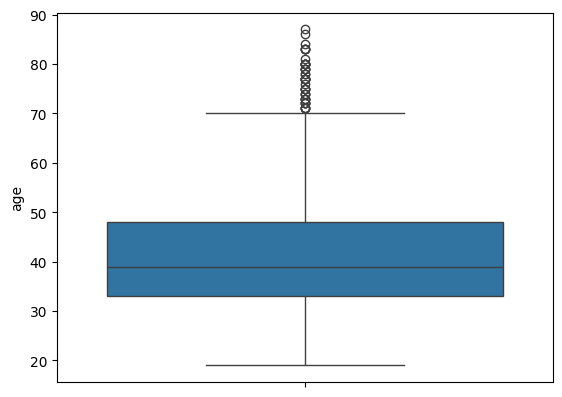

In [41]:
plotOutliers('age', df)

## Activity B
Using the source code from Activity A, create a Python module (e.g. myFunctions.py)
containing created functions. Thanks to that you will be able to import it in any notebook (or script)
without copying the sourceode of functions. For example:
import myFunctions
Provide a notebook with use case.

In [42]:
#import myFunctions as mf
from myFunctions import *
import pandas as pd
import collections

age          457
job          433
marital      418
education    454
default      486
balance      467
housing      440
loan         461
contact      452
day          453
month        469
duration     438
campaign     478
pdays        415
previous     458
poutcome     448
y            459
dtype: int64


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
36,78.0,retired,divorced,primary,no,229.0,no,no,telephone,22.0,oct,97.0,1.0,-1.0,NaN,unknown,yes
129,77.0,retired,divorced,tertiary,NaN,4659.0,no,no,cellular,14.0,apr,161.0,1.0,-1.0,0.0,unknown,yes
166,78.0,housemaid,married,NaN,no,499.0,no,no,telephone,16.0,mar,80.0,4.0,-1.0,0.0,unknown,no
199,75.0,retired,married,secondary,no,3771.0,no,no,telephone,15.0,apr,185.0,1.0,181.0,2.0,success,yes
412,75.0,retired,divorced,tertiary,no,3810.0,NaN,no,cellular,16.0,NaN,262.0,1.0,183.0,1.0,NaN,NaN
477,77.0,retired,married,tertiary,no,7802.0,no,no,telephone,4.0,may,421.0,1.0,NaN,2.0,success,yes
573,81.0,retired,married,NaN,no,1.0,no,no,cellular,19.0,NaN,65.0,5.0,-1.0,0.0,unknown,no
633,83.0,retired,NaN,secondary,no,0.0,no,no,cellular,18.0,mar,140.0,10.0,NaN,0.0,unknown,no
688,80.0,management,married,NaN,no,6483.0,no,no,telephone,19.0,oct,123.0,1.0,-1.0,0.0,unknown,NaN
1126,77.0,retired,married,secondary,no,610.0,no,no,cellular,13.0,aug,766.0,3.0,-1.0,0.0,NaN,no


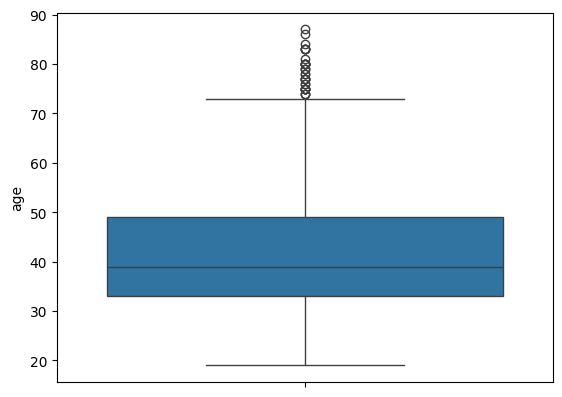

In [43]:
# test
df = pd.read_csv('/workspaces/DataCamp---Data-Scientist-with-Python/09 Analiza dużych zbiorów danych I/bank.csv', sep=';')
ml=0.1
generateMissingVal(df, ml)
lW, uW = calcIQR(df)
print(df.isna().sum())
display(showOutliers('age', df, uW, lW, 'both'))
plotOutliers('age',df)

## Activity C
Modify the function-oriented module created in Activity B and turn it into an object-oriented
code. Create a class myResearch, whose methods will be the functions from Activity B. Store it in
myFunctionsOO.py file. Notice, that you can create fields for myResearch class from some of the
parameters of these functions.
Create a constructor for the myResearch class so that you can create objects as follows:
myObject = myResearch ('bank.csv')
Provide a notebook with use case.

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import collections
import random
import numpy as np 

In [73]:
import myFunctionsOOO as mf

In [74]:
myOb = mf.myResearch('/workspaces/DataCamp---Data-Scientist-with-Python/09 Analiza dużych zbiorów danych I/bank.csv')

age          475
job          493
marital      406
education    479
default      430
balance      433
housing      473
loan         484
contact      436
day          450
month        443
duration     414
campaign     442
pdays        471
previous     485
poutcome     424
y            448
dtype: int64


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
36,78.0,retired,divorced,primary,no,229.0,no,no,telephone,22.0,oct,97.0,1.0,-1.0,NaN,unknown,yes
129,77.0,NaN,divorced,tertiary,no,4659.0,no,no,cellular,NaN,apr,161.0,1.0,-1.0,0.0,unknown,yes
166,78.0,housemaid,married,secondary,no,499.0,no,no,telephone,16.0,mar,80.0,4.0,-1.0,0.0,unknown,no
199,75.0,retired,married,secondary,no,NaN,no,no,telephone,15.0,apr,185.0,1.0,NaN,2.0,success,yes
412,75.0,retired,divorced,NaN,no,NaN,yes,no,cellular,16.0,nov,262.0,NaN,183.0,1.0,failure,yes
477,77.0,retired,married,tertiary,no,7802.0,NaN,no,NaN,4.0,may,421.0,1.0,92.0,2.0,success,NaN
573,81.0,NaN,married,secondary,no,1.0,no,NaN,cellular,19.0,aug,65.0,5.0,-1.0,0.0,unknown,no
633,83.0,retired,married,secondary,no,0.0,no,no,cellular,18.0,mar,140.0,10.0,-1.0,0.0,unknown,no
688,80.0,management,married,primary,no,6483.0,no,no,telephone,19.0,oct,123.0,1.0,-1.0,0.0,unknown,NaN
1126,77.0,retired,married,secondary,no,NaN,NaN,no,cellular,13.0,aug,766.0,3.0,NaN,0.0,unknown,no


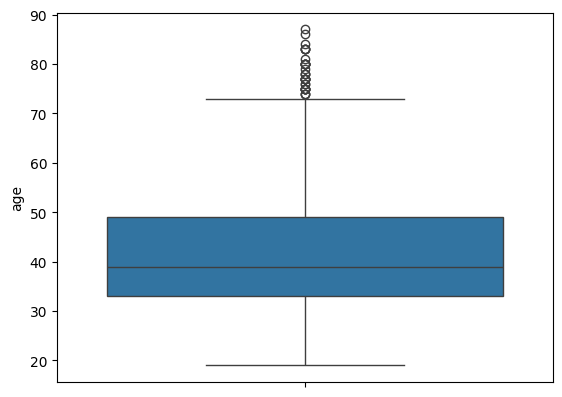

In [75]:
ml=0.1
myOb.generateMissingVal(ml)
print(myOb.df.isna().sum())
display(myOb.showOutliers('age','both'))
myOb.plotOutliers('age')